In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("raw_data/bank_test.csv")
df

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [6]:
#função que determina outliers
#(https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414)
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

###Limpeza de Id, Location e Age

In [7]:
df1 = df.copy()
df1

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [8]:
#remoção da coluna 'location' e 'id'
df1 = df1.drop("location", axis=1)
df1 = df1.drop("id", axis=1)

In [9]:
#determinando os outliers de 'age'
df_temp = df1.copy()
df_temp = df1['age'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)

9.0 73.0


In [10]:
#remoção dos outliers de 'age'
df1 = df1[(df1["age"] < upper_range) | (df1['age'].isna())]
df1 = df1[(df1["age"] > lower_range) | (df1['age'].isna())]

In [11]:
df1 #471 colunas removidas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


###Substituição simples nas colunas housing, loan, default, monhts, y


In [12]:
#substituindo 'sim' e 'não' pelos valores inteiros 1 e 0 para facilitar a manipulação dos dados
df2 = df1.copy()
for col in df2:
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})

C:\Users\chase\AppData\Local\Temp\ipykernel_22400\1315240840.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})


In [13]:
#trocar os nomes dos meses ('jan', 'feb', etc.) pela sua respectiva posição no ano
months = {'aug': 8,'may': 5,'oct': 10,'nov': 11,'jul': 7,'jun': 6,'apr': 4,'jan': 1,'feb': 2,'sep': 9,'mar': 3,'dec': 12}
df2["month"] = df2["month"].replace(months)
df2

C:\Users\chase\AppData\Local\Temp\ipykernel_22400\3851084137.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["month"] = df2["month"].replace(months)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,1,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,2,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,7,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,1,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,5,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,11,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,8,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,6,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,11,187,6.0,188,9.0,failure


###Limpeza de Balance (problema com os outliers)

In [14]:
#determinando os outliers de 'balance'
df_temp = df2.copy()
df_temp = df2['balance'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)

-1990.75 3499.25


In [15]:
#remoção dos outliers do balanço
df_no_bal_outliers = df2.copy()
df_no_bal_outliers = df_no_bal_outliers[(df_no_bal_outliers['balance'] < upper_range) | (df_no_bal_outliers['balance'].isna())]
df_no_bal_outliers = df_no_bal_outliers[(df_no_bal_outliers['balance'] > lower_range) | (df_no_bal_outliers['balance'].isna())]
df_no_bal_outliers #mais de 3000 casas foram removidas, então provavelmente é necessário reconsiderar a remoção desses outliers (talvez mudar a escala?)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,1,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,2,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,7,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,1,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,5,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,11,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,8,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,6,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,11,187,6.0,188,9.0,failure


###Limpeza de Duration

In [16]:
#determinando os outliers de 'duration'
df_temp = df2.copy()
df_temp = df2['balance'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)

-1990.75 3499.25


In [17]:
#remoção dos outliers da feature duration
df3 = df2.copy()
df3 = df3[(df3['duration'] < upper_range) | (df3['duration'].isna())]
df3 = df3[(df3['duration'] > lower_range) | (df3['duration'].isna())]
df3 #67 casas removidas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,1,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,2,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,7,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,1,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,5,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,11,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,8,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,6,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,11,187,6.0,188,9.0,failure


In [18]:
# df4 = df3.copy()
# df4["previous"] = df4["previous"].fillna(np.nan)
# df4 = df4[(df4['previous'] < 60) | (df4['previous'].isna())] #apenas um indivíduo foi removido

# df4['previous'] = df4.apply(lambda x: np.int16(0) if x['previous'] < 6.0 else np.int16(1), axis=1) #achei que fazia mais sentido transformar essa feature para uma feature categórica,
# #pois o gráfico se encontrava muito concentrado

# sns.countplot(df4, x='previous', hue='y')
# plt.figure(figsize = (20,5))
# (df4.groupby('previous')['y'].value_counts(normalize=True)
#    .unstack('y').plot.bar(stacked=True)
# )

###Transformação de 'pdays' e 'previous' em categóricas

In [19]:
df4 = df3.copy()
df4["pdays"] = df4['pdays'].apply(lambda x: 0 if x < 50 else 1) #0 se pdays < 50 e 1 se pdays >= 50
df4["previous"] = df4['previous'].apply(lambda x: 0 if x < 8 else 1) #0 se previous < 8 e 1 se previous >= 8

###Limpeza de Campaign (problema com outliers)

In [20]:
#determinando os outliers de 'campaign'
df_temp = df4.copy()
df_temp = df4['campaign'].dropna()
lower_range, upper_range = outlier_treatment(df_temp)
print(lower_range, upper_range)

-2.0 6.0


In [21]:
#remoção dos outliers da feature campaign
df_no_cam_outliers = df4.copy()
df_no_cam_outliers = df_no_cam_outliers[(df_no_cam_outliers['campaign'] < upper_range) | (df_no_cam_outliers['campaign'].isna())]
df_no_cam_outliers = df_no_cam_outliers[(df_no_cam_outliers['campaign'] > lower_range) | (df_no_cam_outliers['campaign'].isna())]
df_no_cam_outliers #muitas casas removidas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,1,172,1.0,0,0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,2,139,3.0,1,0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,7,210,3.0,1,0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,1,86,1.0,0,0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,5,127,2.0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,38.0,admin.,married,secondary,0,46.0,1,1,unknown,6,5,195,1.0,0,0,unknown
5205,60.0,retired,married,secondary,0,42.0,1,1,unknown,7,5,386,2.0,0,0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,8,234,2.0,0,0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,6,625,1.0,0,0,unknown


ValueError: Could not interpret value `y` for `x`. An entry with this name does not appear in `data`.

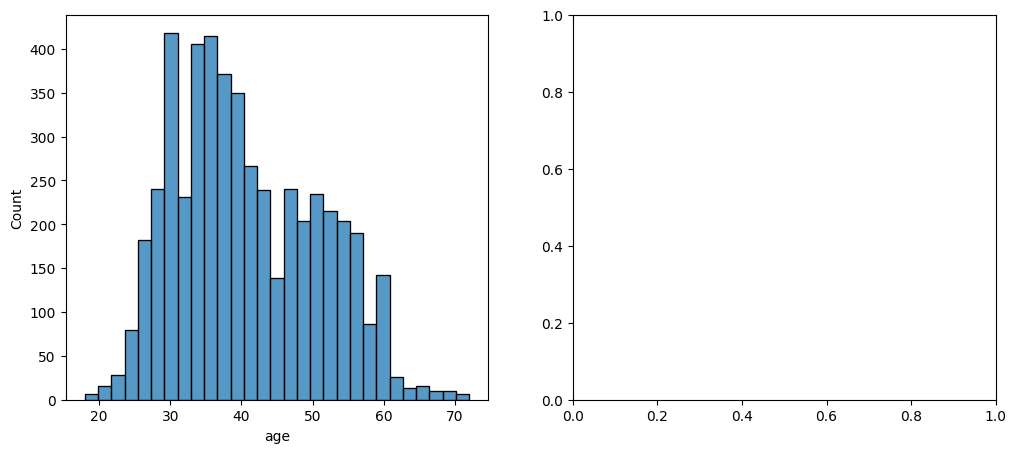

In [22]:
#plotagem de diversos gráficos para a análise exploratória
categoricas = np.array(("marital","education","day","month","pdays","previous","location","default","housing","loan","contact","poutcome"))
numericas = np.array(("age","balance","duration","campaign"))

for feature in (df4.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df4, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df4, x = feature, hue = "y")
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df4, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df4, y = feature, x = "y")
    plt.show()

###Lidando com dados ausentes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#removendo os outliers de balance (não feito antes, pois remove mais de 4k casas)

# df_temp = df4.copy()
# df_temp = df4['balance'].dropna()
# lower_range, upper_range = outlier_treatment(df_temp)
# print(lower_range, upper_range)

df_teste = df4.copy()

# df_teste = df_teste[(df_teste['balance'] < upper_range) | (df_teste['balance'].isna())]
# df_teste = df_teste[(df_teste['balance'] > lower_range) | (df_teste['balance'].isna())]

In [ ]:
#transformando pdays e previous em features categóricas (aumentou a acurácia do knn)

In [ ]:
#preparando o datasset para utilizar knn
#tirei os unknown e other pq n sei oq fazer com eles João: acredito que ao contrário dos unknowns, os others são intencionais (são apenas outra classificação, além de success e failure)
#bora manter os others ent
df_knn_age = df_teste.copy()
df_knn_age = df_knn_age.drop(['campaign','day','duration', 'y'], axis=1)
#df_knn_age = df_knn_age[df_knn_age['poutcome'] != 'unknown']
# df_knn_age = df_knn_age[df_knn_age['poutcome'] != 'other']
#df_knn_age['poutcome'] = df_knn_age['poutcome'].replace({'failure': 0, 'success':1})
df_knn_age = df_knn_age[df_knn_age['contact'] != 'unknown']
df_knn_age = df_knn_age[df_knn_age['job'] != 'unknown']
df_knn_age = df_knn_age[df_knn_age['education'] != 'unknown']
df_knn_age = df_knn_age[df_knn_age['balance'].isna() == False]
df_knn_age = df_knn_age.dropna()


In [ ]:
#transformando dados categóricos com get_dummies
df_knn_age_1 = pd.get_dummies(df_knn_age)
df_knn_age_1

,age,default,balance,housing,loan,month,pdays,previous,job_admin.,job_administrator,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_0,poutcome_1,poutcome_other
11,32.0,0,897.0,1,0,4,1,0,False,False,...,True,False,False,True,False,True,False,True,False,False
23,36.0,0,1053.0,1,0,1,1,0,False,False,...,True,False,False,True,False,False,True,True,False,False
25,29.0,0,1788.0,0,0,2,1,0,False,False,...,False,True,False,False,True,True,False,False,True,False
27,36.0,0,16430.0,1,0,11,1,0,False,False,...,True,False,False,False,True,True,False,True,False,False
30,53.0,0,1563.0,1,0,2,0,0,False,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39966,32.0,0,136.0,0,0,11,1,0,False,False,...,True,False,False,True,False,True,False,False,True,False
39980,37.0,0,176.0,1,0,5,1,0,True,False,...,True,False,False,True,False,True,False,True,False,False
39988,37.0,0,1590.0,1,0,4,1,0,False,False,...,False,True,False,True,False,True,False,False,False,True
39994,35.0,0,122.0,0,0,4,1,0,False,False,...,False,True,False,False,True,True,False,True,False,False


In [ ]:
#botando o dataframe na escala para o knn
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_knn_age_1)
# scaled_data
# df_knn_age_1 = pd.DataFrame(scaled_data, columns = df_knn_age_1.columns)
# df_knn_age_1.head()

In [ ]:
#separando os dados
# X = df_knn_age_1.drop('age', axis = 1)
# y = df_knn_age_1['age']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# https://docs.kanaries.net/topics/Python/python-knn
# knn_regressor = KNeighborsRegressor(n_neighbors=20)
# knn_regressor.fit(X_train, y_train)
# predictions = knn_regressor.predict(X_test)
# print('Score:', knn_regressor.score(X_test, y_test)) #printa a acurácia

# y_pred = knn_regressor.predict(X_test)
# y_pred

In [ ]:
#separando os dados das pessoas cuja idade será deduzida
df_knn_age_unk = df_knn_age_1[np.isnan(df_knn_age_1['age'])]
df_knn_age_2 = df_knn_age_1[np.isfinite(df_knn_age_1['age'])]
df_knn_age_unk

,age,default,balance,housing,loan,month,pdays,previous,job_admin.,job_administrator,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_0,poutcome_1,poutcome_other


In [ ]:
#checando se a sepração funcionou
for col in df_knn_age_2.columns:
  print(col.upper())
  print(df_knn_age_2[col].unique(), df_knn_age_2[col].dtype, "\n")
#não tem nan B)
#depois do getdummies ficou muita coluna mds

AGE
[32. 36. 29. 53. 37. 30. 35. 54. 60. 45. 34. 63. 70. 65. 42. 49. 38. 31.
 33. 27. 47. 23. 39. 51. 40. 26. 44. 43. 28. 41. 50. 48. 19. 58. 25. 46.
 22. 59. 55. 69. 52. 57. 56. 24. 64. 61. 62. 68. 21. 66. 67. 20. 18.] float64 

DEFAULT
[0 1] int16 

BALANCE
[ 897. 1053. 1788. ... 6982. 1733. 1590.] float64 

HOUSING
[1 0] int16 

LOAN
[0 1] int16 

MONTH
[ 4  1  2 11  5  8  6  7  9 10  3 12] int64 

PDAYS
[1 0] int64 

PREVIOUS
[0 1] int64 

JOB_ADMIN.
[False  True] bool 

JOB_ADMINISTRATOR
[False  True] bool 

JOB_BLUE-COLLAR
[ True False] bool 

JOB_ENTREPRENEUR
[False  True] bool 

JOB_HOUSEMAID
[False  True] bool 

JOB_MANAGEMENT
[False  True] bool 

JOB_RETIRED
[False  True] bool 

JOB_SELF-EMPLOYED
[False  True] bool 

JOB_SERVICES
[False  True] bool 

JOB_STUDENT
[False  True] bool 

JOB_TECHNICIAN
[False  True] bool 

JOB_UNEMPLOYED
[False  True] bool 

MARITAL_DIVORCED
[False  True] bool 

MARITAL_MARRIED
[ True False] bool 

MARITAL_SINGLE
[False  True] bool 

EDUCATION_PRI

In [ ]:
#agrupando as idades
#vou agrupar de 7 em 7 mas podemos mudar depois
#quero agrupar em grupos ímpares para a média ser um número inteiro
#agora que eu terminei acho que grupos de 13 seria melhor mas já foi kkk
def agrupar(column):
    df_knn_age_2[column] = df_knn_age_2[column].apply(
        lambda a: 1 if a <= 24 else
                  2 if 24 < a <= 31 else
                  3 if 31 < a <= 38 else
                  4 if 38 < a <= 45 else
                  5 if 45 < a <= 52 else
                  6 if 52 < a <= 59 else
                  7 if 59 < a <= 66 else
                  8 if 66 < a <= 73 else
                  9 if 73 < a <= 80 else
                  10 if 80 < a <= 87 else
                  11 if 87 < a <= 94 else
                  12
    )
agrupar('age')
df_knn_age_2

,age,default,balance,housing,loan,month,pdays,previous,job_admin.,job_administrator,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_0,poutcome_1,poutcome_other
11,3,0,897.0,1,0,4,1,0,False,False,...,True,False,False,True,False,True,False,True,False,False
23,3,0,1053.0,1,0,1,1,0,False,False,...,True,False,False,True,False,False,True,True,False,False
25,2,0,1788.0,0,0,2,1,0,False,False,...,False,True,False,False,True,True,False,False,True,False
27,3,0,16430.0,1,0,11,1,0,False,False,...,True,False,False,False,True,True,False,True,False,False
30,6,0,1563.0,1,0,2,0,0,False,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39966,3,0,136.0,0,0,11,1,0,False,False,...,True,False,False,True,False,True,False,False,True,False
39980,3,0,176.0,1,0,5,1,0,True,False,...,True,False,False,True,False,True,False,True,False,False
39988,3,0,1590.0,1,0,4,1,0,False,False,...,False,True,False,True,False,True,False,False,False,True
39994,3,0,122.0,0,0,4,1,0,False,False,...,False,True,False,False,True,True,False,True,False,False
